# Setup

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
def setxTicks(ax, N = 5):
    xmin, xmax = ax.get_xlim()
    custom_ticks = np.linspace(xmin, xmax, N, dtype=int)
    ax.set_xticks(custom_ticks)
    ax.set_xticklabels(custom_ticks)

def plotP(flist, obsf, labels,
             starname = '',
             syntdir = "/home/morgan/Turbospectrum2019/COM-v19.1/syntspec/",
             apogdir = "/home/morgan/PhD/Data/apogee/",
             xlim1 = (15702,15720), xlim2 = (16480,16488), ylim1 = (0.84,1.01), ylim2 = (0.84,1.01),
             xoffset1 = 0, yoffset1 = 0, ncorr1 = 1,
             xoffset2 = 0, yoffset2 = 0, ncorr2 = 1):
    """
    This function will plot the region around the lines of P, S and K in the IR with the input for a list of synthetic spectra and a APOGEE one
    :param flistac:  List of names of files containing the synthetic spectra used for the P lines, around 15600 and 16600, 
                as to include the PI line in 16482.9, in flux per wavelength
    :param flistbc:  List of name of files containing the synthetic spectra in the range for the S and K lines, 
                from 15000 to 16000.
    :param obsf:  Name of the file containing the observed spectra from APOGEE. 
                This spectra is not normalized, so additional normalization parameters should be entered as well
    :param norm: Normalization parameters to be divided from flux values, one for each range around the interested lines, to be entered manually for each input star. 
                Five parameters, ordered for: PI 15711.6, PI 16482.9, KI 15163.067 and KI 15168.376, SI 15469.8036, SI 15475.604 and SI 15478.469.
    """

    fname = apogdir + obsf
    apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
    
    specdata = []
    
    for f in flist:
        fname = syntdir + f
        specdata.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))

    norm = [apogdata[apogdata['Wavelength'].between(15702,15720)]['Flux'].median(),
           apogdata[apogdata['Wavelength'].between(16480,16490)]['Flux'].median()]

    # PI lines plots

    fig, ax = plt.subplots(2)

    ax[0].plot(apogdata["Wavelength"] + xoffset1, (apogdata["Flux"]/norm[0])/ncorr1 + yoffset1, color="red")
    for d, l in zip(specdata, labels):
        ax[0].plot(d["Wavelength"], d["Flux"], label = l)

    ax[0].set_title("PI lines - " + starname)
    ax[0].set_xlim(*xlim1)
    ax[0].set_ylim(*ylim1)
    ax[0].vlines(x = 15711.6, ymin = 1.0, ymax=1.05, color="purple") # PI 15711.6
    setxTicks(ax[0])

    
    ax[1].plot(apogdata["Wavelength"] + xoffset2, (apogdata["Flux"]/norm[1])/ncorr2 + yoffset2, color="red")
    for d, l in zip(specdata, labels):
        ax[1].plot(d["Wavelength"], d["Flux"], label = l)

    ax[1].set_xlim(*xlim2)
    ax[1].set_ylim(*ylim2)
    ax[1].set_xlabel("Wavelength (A)")
    ax[1].vlines(x = 16482.9, ymin = 1.0, ymax=1.05, color="purple") # PI 16482.9
    setxTicks(ax[1])
    plt.legend(loc = 'lower left')
    figname = starname + "_p.png"
    plt.savefig(figname)
    plt.show()


    
def plotK(flist, obsf, labels,
             starname = '',
             syntdir = "/home/morgan/Turbospectrum2019/COM-v19.1/syntspec/",
             apogdir = "/home/morgan/PhD/Data/apogee/",
             xlim1 = (15160,15170), ylim1 = (0.84,1.01),
             xoffset1 = 0, yoffset1 = 0, ncorr1 = 1):
    """
    This function will plot the region around the lines of P, S and K in the IR with the input for a list of synthetic spectra and a APOGEE one
    :param flistac:  List of names of files containing the synthetic spectra used for the P lines, around 15600 and 16600, 
                as to include the PI line in 16482.9, in flux per wavelength
    :param flistbc:  List of name of files containing the synthetic spectra in the range for the S and K lines, 
                from 15000 to 16000.
    :param obsf:  Name of the file containing the observed spectra from APOGEE. 
                This spectra is not normalized, so additional normalization parameters should be entered as well
    :param norm: Normalization parameters to be divided from flux values, one for each range around the interested lines, to be entered manually for each input star. 
                Five parameters, ordered for: PI 15711.6, PI 16482.9, KI 15163.067 and KI 15168.376, SI 15469.8036, SI 15475.604 and SI 15478.469.
    """

    fname = apogdir + obsf
    apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
    
    specdata = []
    
                        
    for f in flist:
        fname = syntdir + f
        specdata.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))

    norm = apogdata[apogdata['Wavelength'].between(15155,15175)]['Flux'].median()
    
    # These set of parameters are the limits of each plot, around the zones containing our lines of interest
    lim = (15160, 15170)

    # KI lines plot

    fig, ax = plt.subplots()

    ax.plot(apogdata["Wavelength"] + xoffset1, (apogdata["Flux"]/norm)/ncorr1 + yoffset1, color="red")
    for d, l in zip(specdata, labels):
        ax.plot(d["Wavelength"], d["Flux"], label = l)

    ax.set_title("KI lines - " + starname)
    ax.set_xlim(*xlim1)
    ax.set_ylim(*ylim1)
    ax.vlines(x = [15163.067, 15168,376], ymin = 1.0, ymax=1.05, color="purple") # KI 15163.067 and KI 15168.376
    setxTicks(ax)
    plt.legend(loc = 'lower left')
    figname = starname + "_k.png"
    plt.savefig(figname)
    plt.show()



    
def plotS(flist, obsf, labels,
             starname = '',
             syntdir = "/home/morgan/Turbospectrum2019/COM-v19.1/syntspec/",
             apogdir = "/home/morgan/PhD/Data/apogee/",
             xlim1 = (15465, 15473), xlim2 = (15472, 15482), ylim1 = (0.84,1.01), ylim2 = (0.84,1.01),
             xoffset1 = 0, yoffset1 = 0, ncorr1 = 1,
             xoffset2 = 0, yoffset2 = 0, ncorr2 = 1):
    """
    This function will plot the region around the lines of P, S and K in the IR with the input for a list of synthetic spectra and a APOGEE one
    :param flistac:  List of names of files containing the synthetic spectra used for the P lines, around 15600 and 16600, 
                as to include the PI line in 16482.9, in flux per wavelength
    :param flistbc:  List of name of files containing the synthetic spectra in the range for the S and K lines, 
                from 15000 to 16000.
    :param obsf:  Name of the file containing the observed spectra from APOGEE. 
                This spectra is not normalized, so additional normalization parameters should be entered as well
    :param norm: Normalization parameters to be divided from flux values, one for each range around the interested lines, to be entered manually for each input star. 
                Five parameters, ordered for: PI 15711.6, PI 16482.9, KI 15163.067 and KI 15168.376, SI 15469.8036, SI 15475.604 and SI 15478.469.
    """

    fname = apogdir + obsf
    apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
    
    specdata = []
    
    for f in flist:
        fname = syntdir + f
        specdata.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))

    norm = [apogdata[apogdata['Wavelength'].between(15465,15475)]['Flux'].median(),
           apogdata[apogdata['Wavelength'].between(15470,15485)]['Flux'].median()]
    
    # These set of parameters are the limits of each plot, around the zones containing our lines of interest
    lim1 = (15465, 15473)
    lim2 = (15472, 15482)

    fig, ax = plt.subplots(2)

    ax[0].plot(apogdata["Wavelength"] + xoffset1, (apogdata["Flux"]/norm[0])/ncorr1 + yoffset1, color="red")
    for d, l in zip(specdata, labels):
        ax[0].plot(d["Wavelength"], d["Flux"], label = l)

    ax[0].set_title("SI lines - " + starname)
    ax[0].set_xlim(*xlim1)
    ax[0].set_ylim(*ylim1)
    ax[0].vlines(x = 15469.8036, ymin = 1.0, ymax=1.05, color="purple") # SI 15469.8036
    setxTicks(ax[0])
    
    ax[1].plot(apogdata["Wavelength"] + xoffset2, (apogdata["Flux"]/norm[0])/ncorr2 + yoffset2, color="red")
    for d, l in zip(specdata, labels):
        ax[1].plot(d["Wavelength"], d["Flux"], label = l)
    
    ax[1].set_xlim(*xlim2)
    ax[1].set_ylim(*ylim2)
    ax[1].set_xlabel("Wavelength (A)")
    ax[1].vlines(x = [15475.604, 15478.469], ymin = 1.0, ymax=1.05, color="purple") # SI 15475.604 and SI 15478.469
    setxTicks(ax[1])
    plt.legend(loc = 'lower left')
    figname = starname + "_s.png"
    plt.savefig(figname)
    plt.show()


def plotC(flist, obsf, labels,
             starname = '',
             syntdir = "/home/morgan/Turbospectrum2019/COM-v19.1/syntspec/",
             apogdir = "/home/morgan/PhD/Data/apogee/",
             xlim1 = (15520, 15555), xlim2 = (15555, 15575), xlim3 = (15575, 15590), 
             ylim1 = (0.75, 1.05), ylim2 = (0.75, 1.05), ylim3 = (0.75, 1.05),
             xoffset1 = 0, yoffset1 = 0, ncorr1 = 1,
             xoffset2 = 0, yoffset2 = 0, ncorr2 = 1,
             xoffset3 = 0, yoffset3 = 0, ncorr3 = 1):
    """
    This function will plot the region around the lines of P, S and K in the IR with the input for a list of synthetic spectra and a APOGEE one
    :param flistac:  List of names of files containing the synthetic spectra used for the P lines, around 15600 and 16600, 
                as to include the PI line in 16482.9, in flux per wavelength
    :param flistbc:  List of name of files containing the synthetic spectra in the range for the S and K lines, 
                from 15000 to 16000.
    :param obsf:  Name of the file containing the observed spectra from APOGEE. 
                This spectra is not normalized, so additional normalization parameters should be entered as well
    :param norm: Normalization parameters to be divided from flux values, one for each range around the interested lines, to be entered manually for each input star. 
                Five parameters, ordered for: PI 15711.6, PI 16482.9, KI 15163.067 and KI 15168.376, SI 15469.8036, SI 15475.604 and SI 15478.469.
    """

    fname = apogdir + obsf
    apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
    
    specdata = []
    
    for f in flist:
        fname = syntdir + f
        specdata.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))

    norm = [apogdata[apogdata['Wavelength'].between(15520,15555)]['Flux'].median(),
           apogdata[apogdata['Wavelength'].between(15555,15575)]['Flux'].median(),
           apogdata[apogdata['Wavelength'].between(15575,15590)]['Flux'].median()]

    # PI lines plots

    fig, ax = plt.subplots(3)

    ax[0].plot(apogdata["Wavelength"] + xoffset1, (apogdata["Flux"]/norm[0])/ncorr1 + yoffset1, color="red")
    for d, l in zip(specdata, labels):
        ax[0].plot(d["Wavelength"], d["Flux"], label = l)

    ax[0].set_title("CNO lines - " + starname)
    ax[0].vlines(x = [15528.063, 15528.734, 15529.9, 15530.8, 15534.4, 15535.5, 15536.7, 15540.23, 15542.20, 15542.90, 15544.5, 15550.45, 15552.8, 15553.6, 15554.5], ymin = 1.01, ymax=1.03, color="purple")
    ax[0].set_xlim(*xlim1)
    ax[0].set_ylim(*ylim1)
    setxTicks(ax[0])

    
    ax[1].plot(apogdata["Wavelength"] + xoffset2, (apogdata["Flux"]/norm[1])/ncorr2 + yoffset2, color="red")
    for d, l in zip(specdata, labels):
        ax[1].plot(d["Wavelength"], d["Flux"], label = l)
    
    ax[1].vlines(x = [15555.2, 15557.9, 15558.7, 15560.24, 15561.4, 15562.2, 15562.4, 15563.4, 15565.91, 15568.78, 15572.1, 15573.2], ymin = 1.01, ymax=1.03, color="purple")
    ax[1].set_xlim(*xlim2)
    ax[1].set_ylim(*ylim2)
    ax[1].set_xlabel("Wavelength (A)")
    setxTicks(ax[1])

    ax[2].plot(apogdata["Wavelength"] + xoffset3, (apogdata["Flux"]/norm[2])/ncorr3 + yoffset3, color="red")
    for d, l in zip(specdata, labels):
        ax[2].plot(d["Wavelength"], d["Flux"], label = l)
    ax[2].vlines(x = [15575.0, 15577.4, 15578.4, 15578.8, 15579.3, 15579.8, 15581.0, 15581.8, 15582.6, 15583.5, 15584.4, 15585.4, 15585.716, 15586.4], ymin = 1.01, ymax=1.03, color="purple")
    ax[2].set_xlim(*xlim3)
    ax[2].set_ylim(*ylim3)
    ax[2].set_xlabel("Wavelength (A)")
    setxTicks(ax[2])
    
    figname = starname + "_c.png"
    plt.legend(loc = 'lower right')
    plt.savefig(figname)
    plt.show()

<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:95: SyntaxWarning: invalid escape sequence '\s'
<>:143: SyntaxWarning: invalid escape sequence '\s'
<>:149: SyntaxWarning: invalid escape sequence '\s'
<>:207: SyntaxWarning: invalid escape sequence '\s'
<>:213: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:95: SyntaxWarning: invalid escape sequence '\s'
<>:143: SyntaxWarning: invalid escape sequence '\s'
<>:149: SyntaxWarning: invalid escape sequence '\s'
<>:207: SyntaxWarning: invalid escape sequence '\s'
<>:213: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3492/3722793245.py:27: SyntaxWarning: invalid escape sequence '\s'
  apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment=

# Bulge

## prev

### B1

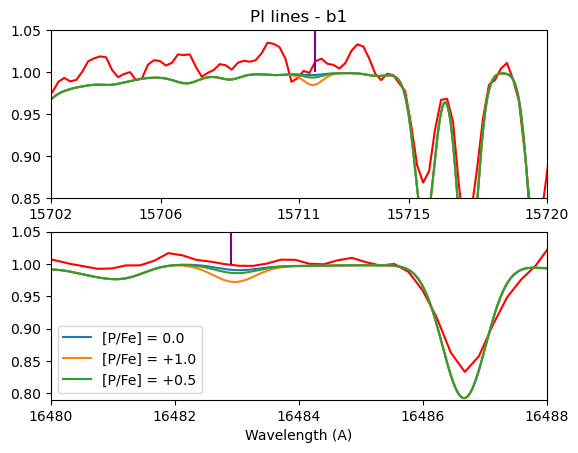

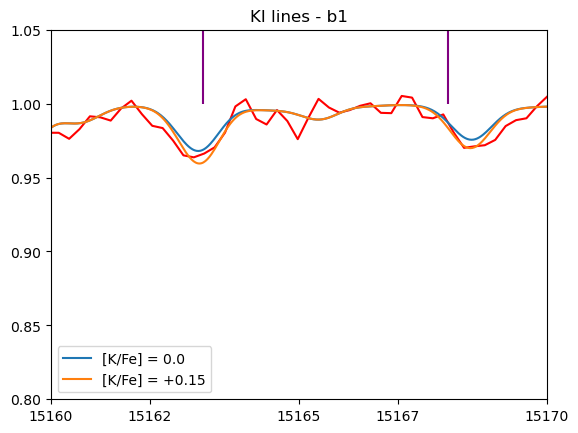

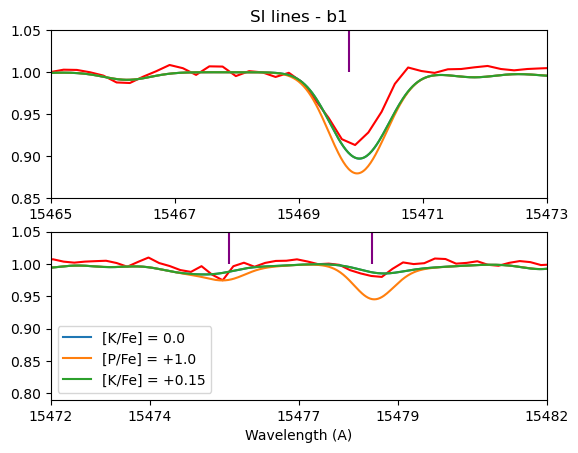

In [79]:
speclist = ["b1xac75.dat", "b1xap1c75.dat", "b1xap05c75.dat"]
starname = 'b1'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0', '[P/Fe] = +0.5']
plotP(speclist, "dr14/b1.dat", label, starname,
     ylim1 = (0.85, 1.05), xoffset1 = -0.1,
     ylim2 = (0.79, 1.05), xoffset2 = -0.1)

speclist = ["b1xbc85.dat", "b1xbk015c85.dat"]
label = ['[K/Fe] = 0.0', '[K/Fe] = +0.15']
plotK(speclist, "dr14/b1.dat", label, starname,
     ylim1 = (0.80, 1.05), xoffset1 = 0.15, ncorr1 = 1.01)

speclist = ["b1xbc85.dat", "b1xbp1c85.dat", "b1xbk015c85.dat"]
label = ['[K/Fe] = 0.0', '[P/Fe] = +1.0', '[K/Fe] = +0.15']
plotS(speclist, "dr14/b1.dat", label, starname,
     ylim1 = (0.85, 1.05), xoffset1 = -0.1,
     ylim2 = (0.79, 1.05), xoffset2 = -0.1)

### B2

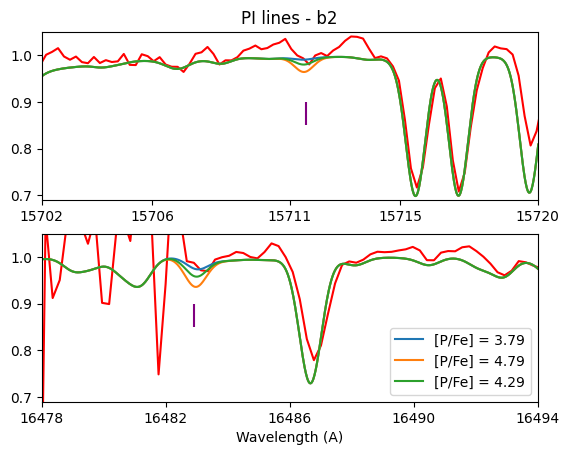

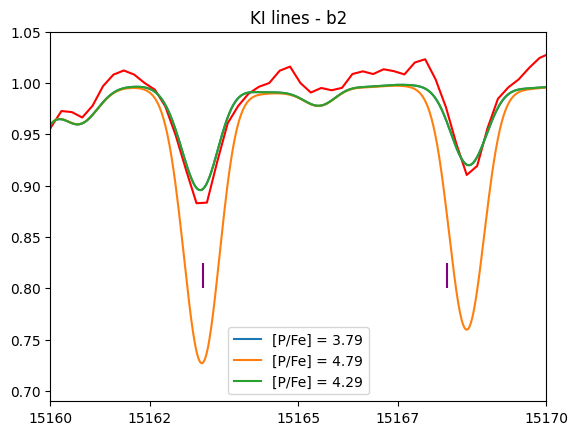

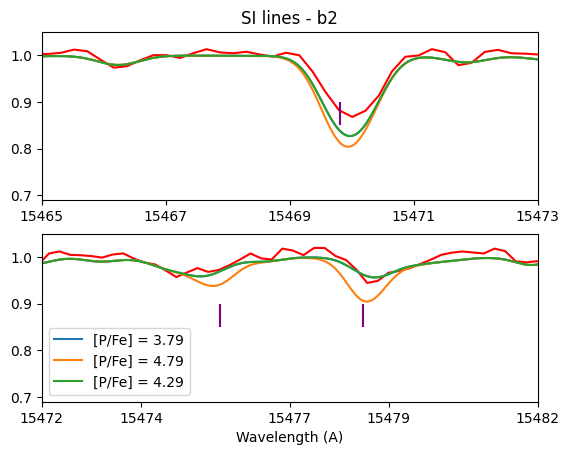

In [86]:
speclist = ["b2xac75.dat", "b2xap1c75.dat", "b2xap06c75.dat"]
starname = 'b2'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0', '[P/Fe] = +0.5']
plotP(speclist, "dr14/b2.dat", label, starname,
     ylim1 = (0.9, 1.05), xoffset1 = -0.1,
     ylim2 = (0.79, 1.05), xoffset2 = -0.1)

speclist = ["b2xbc75.dat", "b2xbp1c75.dat", "b2xbc75.dat"]
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0', '[P/Fe] = +0.5']
plotK(speclist, "b2.dat", label, starname)
plotS(speclist, "b2.dat", label, starname)

### B3

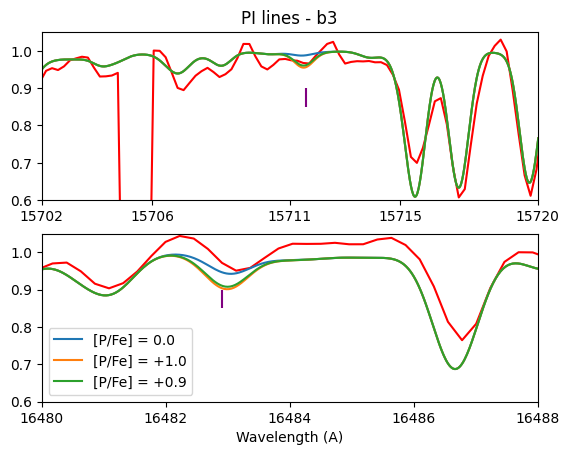

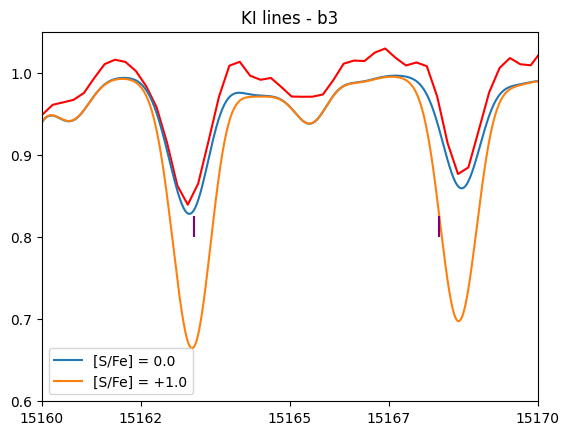

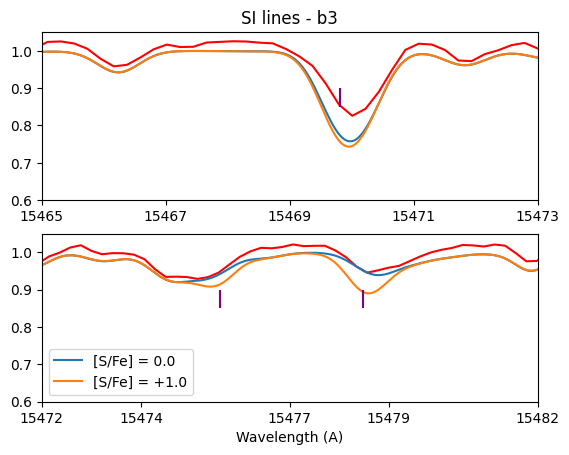

In [170]:
speclist = ["b3xac75.dat", "b3xap1c75.dat", "b3xap09c75.dat"]
starname = 'b3'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0', '[P/Fe] = +0.9']
plotP(speclist, "b3.dat", label, starname, yoffset = -0.05)

speclist = ["b3xbc75.dat", "b3xbp1c75.dat"]
label = ['[S/Fe] = 0.0', '[S/Fe] = +1.0']
plotK(speclist, "b3.dat", label, starname)
plotS(speclist, "b3.dat", label, starname)

## N6558

### 44580

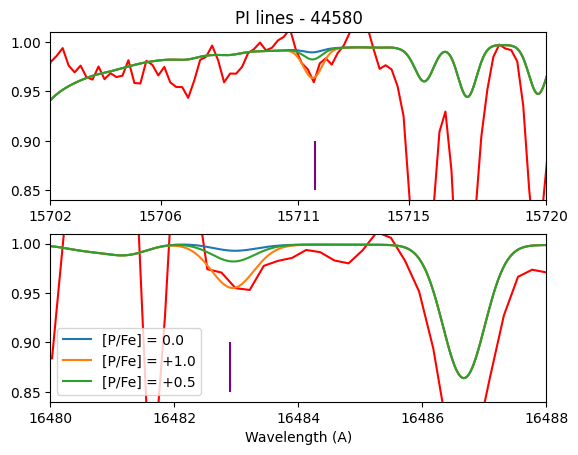

In [17]:
speclist = ["44580xa.dat", "44580xap1.dat", "44580xap05.dat"]
starname = '44580'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0', '[P/Fe] = +0.5']
plotP(speclist, "b2.dat", label, starname, offset = -0.15, yoffset = -0.01, ncorr = 1.0175)

### 46216

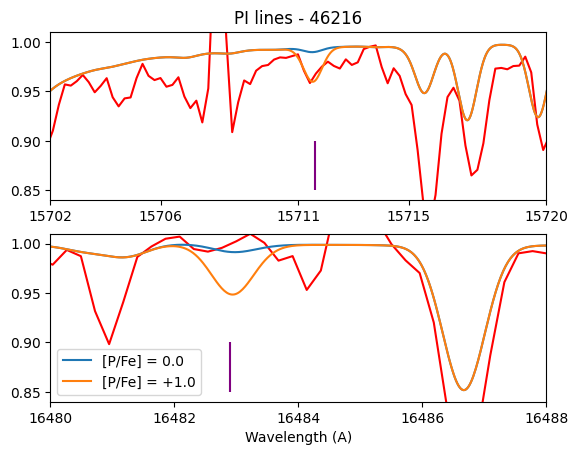

In [12]:
speclist = ["46216xa.dat", "46216xap1.dat"]
starname = '46216'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "46216.dat", label, starname, offset = 5.9, yoffset = -0.02, ncorr = 1.01)

### 46515

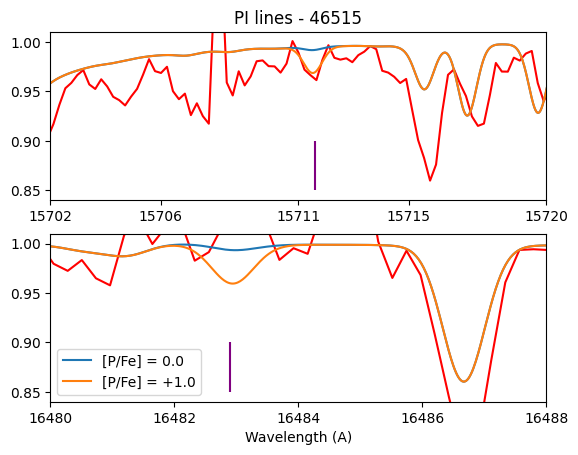

In [13]:
speclist = ["46515xa.dat", "46515xap1.dat"]
starname = '46515'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "46515.dat", label, starname, offset = 6, yoffset = -0.02, ncorr = 1.01)

### 45246

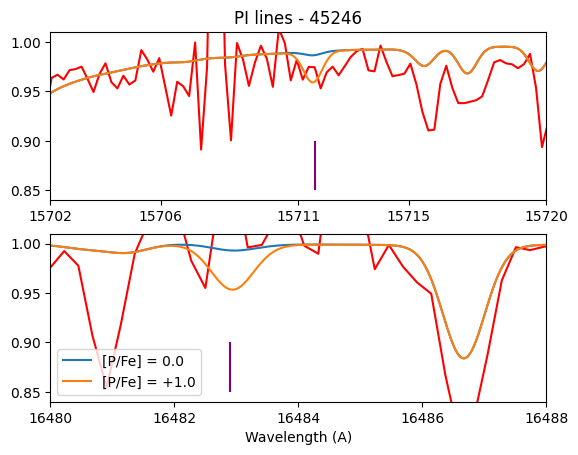

In [14]:
speclist = ["45246xa.dat", "45246xap1.dat"]
starname = '45246'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "45246.dat", label, starname, offset = 5.8, yoffset = -0.02, ncorr = 1.01)

## N6522

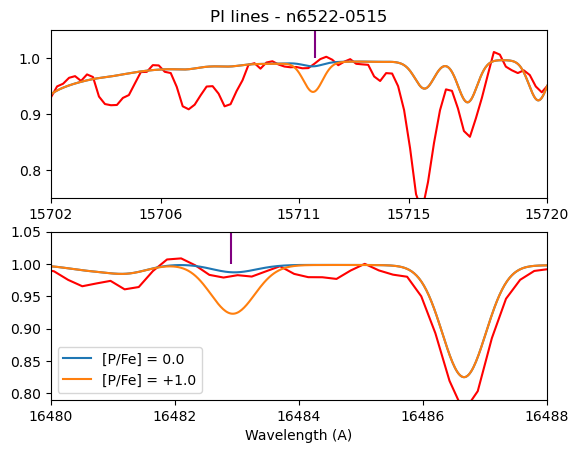

In [99]:
speclist = ["n6522-0515xa.dat", "n6522-0515xap1.dat"]
starname = 'n6522-0515'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6522-0515.dat", label, starname, 
      xoffset1 = -3.625, yoffset1 = -0.04, ncorr1 = 1.01, 
      xoffset2 = -3.775, yoffset2 = -0.02,
      ylim1 = (0.75, 1.05), ylim2 = (0.79, 1.05))

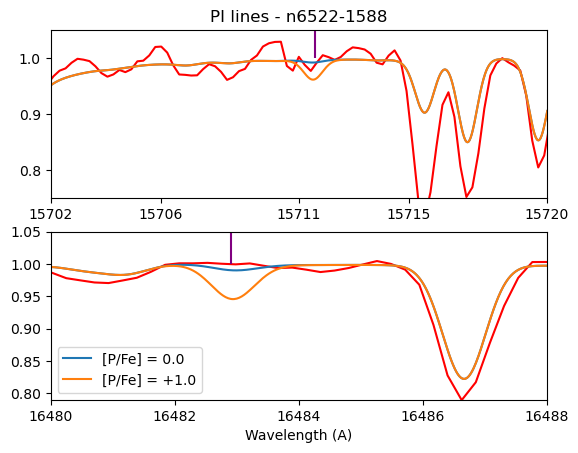

In [98]:
speclist = ["n6522-1588xa.dat", "n6522-1588xap1.dat"]
starname = 'n6522-1588'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6522-1588.dat", label, starname, 
      xoffset1 = -3.625, yoffset1 = -0.02, ncorr1 = 1.0, 
      xoffset2 = -3.9, yoffset2 = -0.01,
      ylim1 = (0.75, 1.05), ylim2 = (0.79, 1.05))

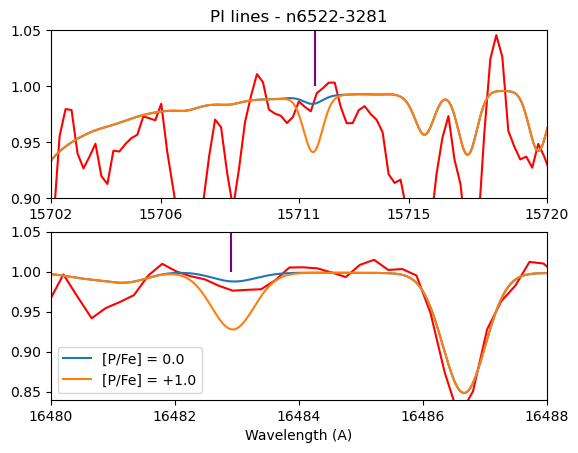

In [131]:
speclist = ["n6522-3281xa.dat", "n6522-3281xap1.dat"]
starname = 'n6522-3281'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6522-3281.dat", label, starname, 
      xoffset1 = -3.2, yoffset1 = -0.01, ncorr1 = 1.05, 
      xoffset2 = -3.5, yoffset2 = -0.02,
      ylim1 = (0.9, 1.05), ylim2 = (0.84, 1.05))

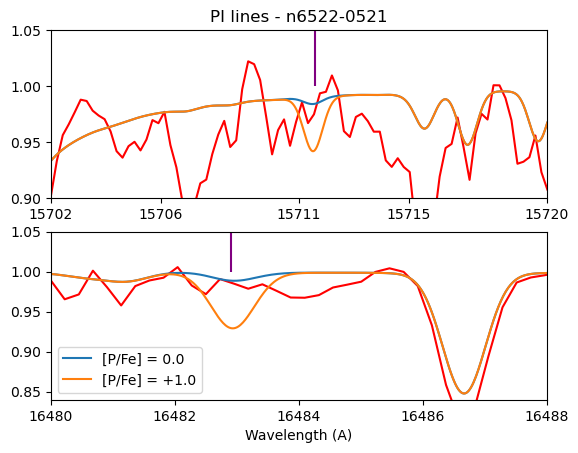

In [139]:
speclist = ["n6522-0521xa.dat", "n6522-0521xap1.dat"]
starname = 'n6522-0521'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6522-0521.dat", label, starname, 
      xoffset1 = -3.2, yoffset1 = 0.02, ncorr1 = 1.07, 
      xoffset2 = -3.6, yoffset2 = -0.02,
      ylim1 = (0.9, 1.05), ylim2 = (0.84, 1.05))

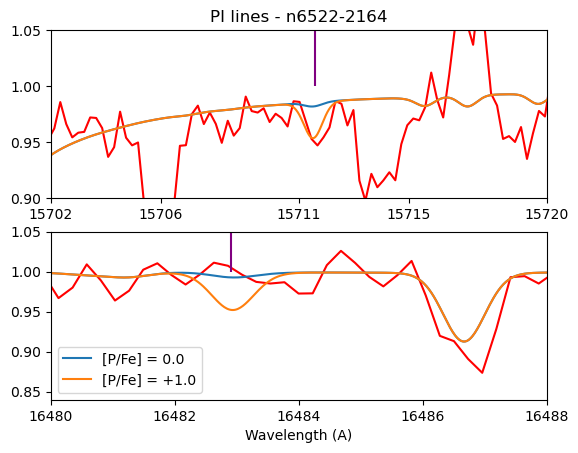

In [191]:
speclist = ["n6522-2164xa.dat", "n6522-2164xap1.dat"]
starname = 'n6522-2164'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6522-2164.dat", label, starname, 
      xoffset1 = -4.2, yoffset1 = 0.01, ncorr1 = 1.05, 
      xoffset2 = -4.2, yoffset2 = -0.01, ncorr2 = 1.0,
      ylim1 = (0.9, 1.05), ylim2 = (0.84, 1.05))

## UKS1

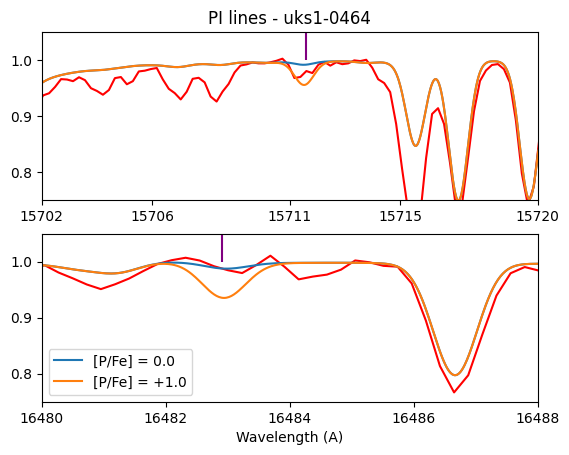

In [28]:
speclist = ["uks1-0464xa.dat", "uks1-0464xap1.dat"]
starname = 'uks1-0464'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "uks1-0464.dat", label, starname, 
      xoffset1 = -7.7, yoffset1 = 0.01, ncorr1 = 1.05, 
      xoffset2 = -8.1, yoffset2 = -0.01, ncorr2 = 1.02,
      ylim1 = (0.75, 1.05), ylim2 = (0.75, 1.05))

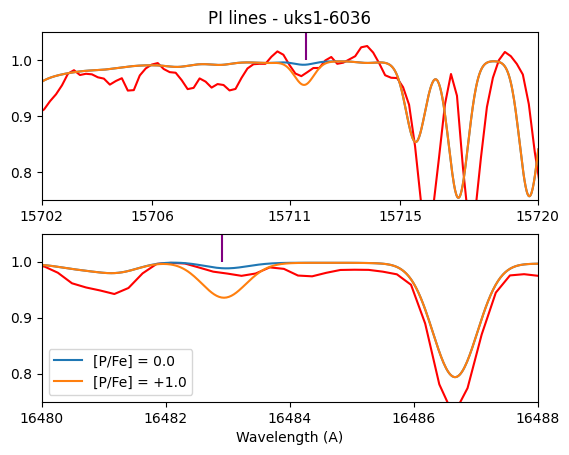

In [178]:
speclist = ["uks1-6036xa.dat", "uks1-6036xap1.dat"]
starname = 'uks1-6036'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "uks1-6036.dat", label, starname, 
      xoffset1 = -7.65, yoffset1 = 0.01, ncorr1 = 1.05, 
      xoffset2 = -8.55, yoffset2 = -0.01, ncorr2 = 1.02,
      ylim1 = (0.75, 1.05), ylim2 = (0.75, 1.05))

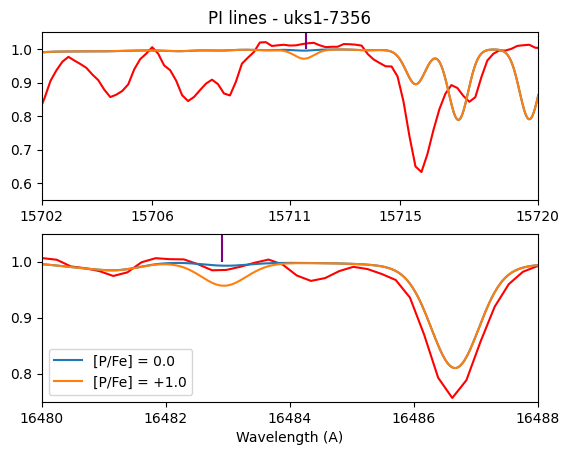

In [167]:
speclist = ["uks1-7356xa.dat", "uks1-7356xap1.dat"]
starname = 'uks1-7356'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "uks1-7356.dat", label, starname, 
      xoffset1 = -6.5, yoffset1 = -0.055, ncorr1 = 1.01, 
      xoffset2 = -7.15, yoffset2 = -0.01, ncorr2 = 1.0,
      ylim1 = (0.55, 1.05), ylim2 = (0.75, 1.05))

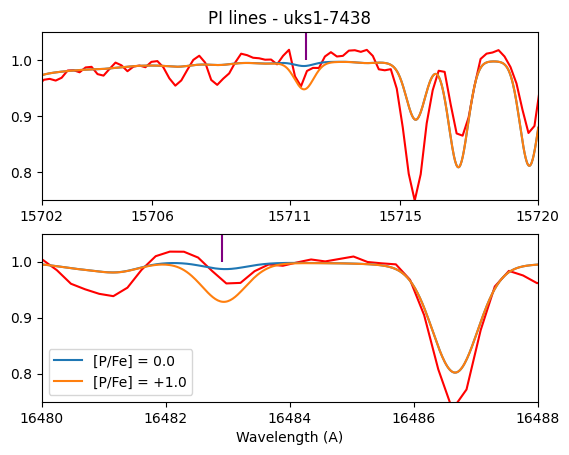

In [109]:
speclist = ["uks1-7438xa.dat", "uks1-7438xap1.dat"]
starname = 'uks1-7438'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "uks1-7438.dat", label, starname, 
      xoffset1 = -7.7, yoffset1 = -0.025, ncorr1 = 1.0, 
      xoffset2 = -8.15, yoffset2 = -0.0175, ncorr2 = 1.0,
      ylim1 = (0.75, 1.05), ylim2 = (0.75, 1.05))

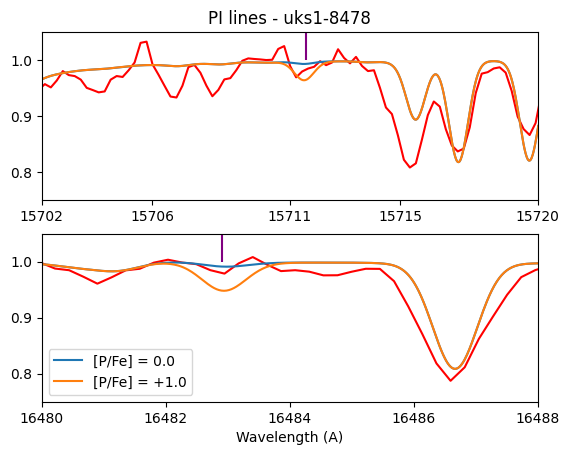

In [115]:
speclist = ["uks1-8478xa.dat", "uks1-8478xap1.dat"]
starname = 'uks1-8478'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "uks1-8478.dat", label, starname, 
      xoffset1 = -7.8, yoffset1 = -0.025, ncorr1 = 1.01, 
      xoffset2 = -8.1, yoffset2 = -0.0175, ncorr2 = 1.0,
      ylim1 = (0.75, 1.05), ylim2 = (0.75, 1.05))

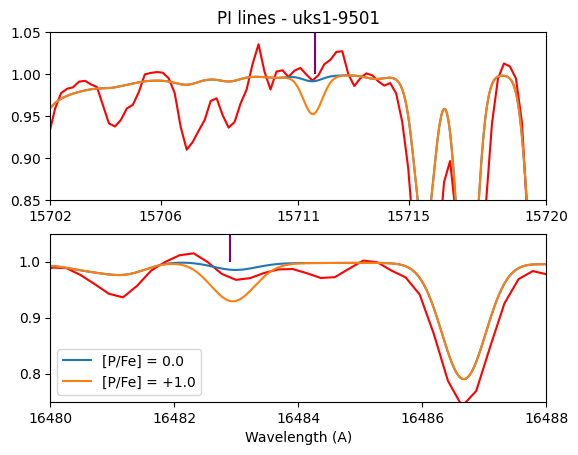

In [144]:
speclist = ["uks1-9501xa.dat", "uks1-9501xap1.dat"]
starname = 'uks1-9501'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "uks1-9501.dat", label, starname, 
      xoffset1 = -9, yoffset1 = -0.035, ncorr1 = 1.01, 
      xoffset2 = -9.6, yoffset2 = -0.05, ncorr2 = 1.01,
      ylim1 = (0.85, 1.05), ylim2 = (0.75, 1.05))

## N6723

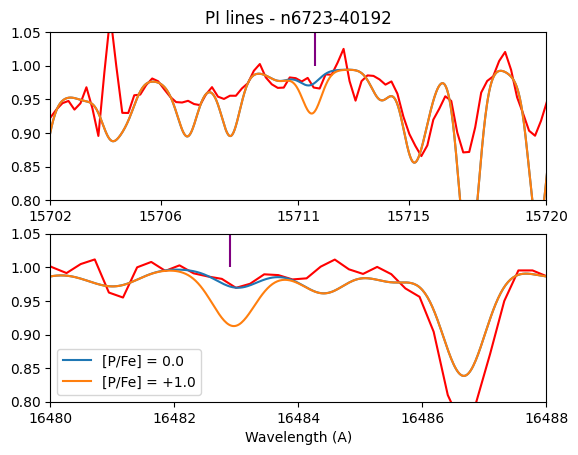

In [3]:
speclist = ["n6723-40192xa.dat", "n6723-40192xap1.dat"]
starname = 'n6723-40192'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6723-40192.dat", label, starname, 
      xoffset1 = 0.6, yoffset1 = -0.04, ncorr1 = 1.0, 
      xoffset2 = 0.65, yoffset2 = -0.01, ncorr2 = 1.0,
      ylim1 = (0.80, 1.05), ylim2 = (0.80, 1.05))

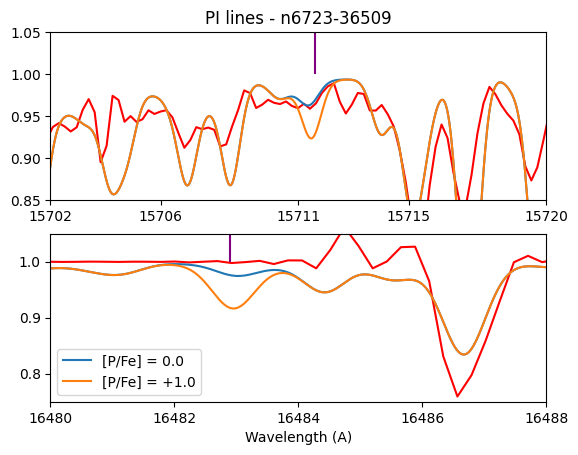

In [9]:
speclist = ["n6723-36509xa.dat", "n6723-36509xap1.dat"]
starname = 'n6723-36509'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6723-36509.dat", label, starname, 
      xoffset1 = 0.2, yoffset1 = -0.05, ncorr1 = 1.0, 
      xoffset2 = 0.3, yoffset2 = 0, ncorr2 = 1.0,
      ylim1 = (0.85, 1.05), ylim2 = (0.75, 1.05))

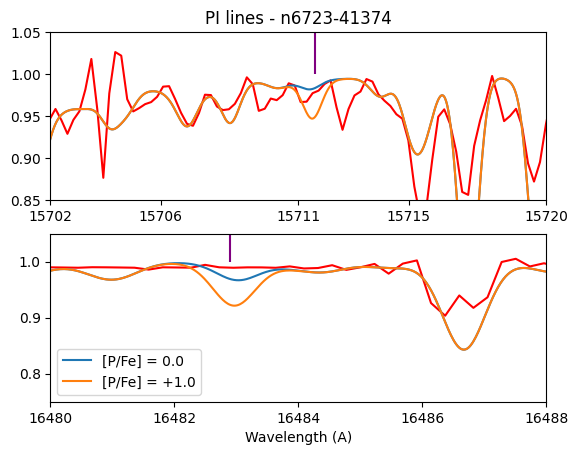

In [5]:
speclist = ["n6723-41374xa.dat", "n6723-41374xap1.dat"]
starname = 'n6723-41374'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6723-41374.dat", label, starname, 
      xoffset1 = 0.2, yoffset1 = -0.02, ncorr1 = 1.02, 
      xoffset2 = 0, yoffset2 = -0.01, ncorr2 = 1.0,
      ylim1 = (0.85, 1.05), ylim2 = (0.75, 1.05))

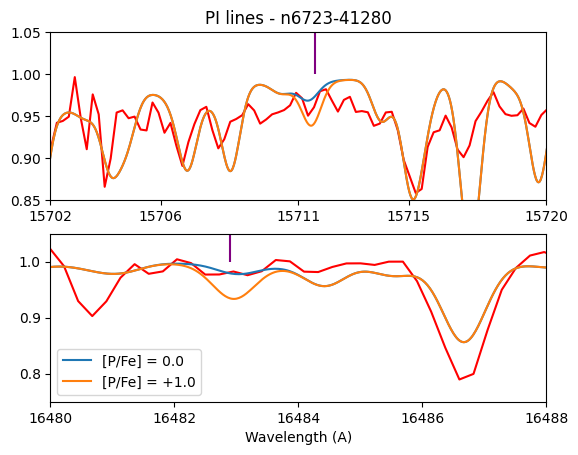

In [6]:
speclist = ["n6723-41280xa.dat", "n6723-41280xap1.dat"]
starname = 'n6723-41280'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6723-41280.dat", label, starname, 
      xoffset1 = 0.1, yoffset1 = -0.03, ncorr1 = 1.02, 
      xoffset2 = 0.3, yoffset2 = -0.01, ncorr2 = 1.0,
      ylim1 = (0.85, 1.05), ylim2 = (0.75, 1.05))

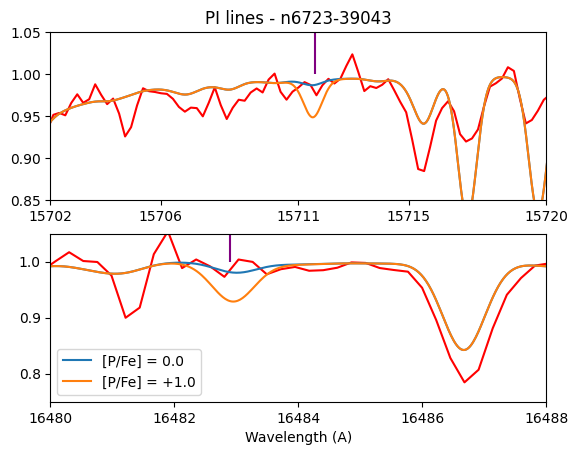

In [7]:
speclist = ["n6723-39043xa.dat", "n6723-39043xap1.dat"]
starname = 'n6723-39043'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6723-39043.dat", label, starname, 
      xoffset1 = 0.9, yoffset1 = -0.0, ncorr1 = 1.03, 
      xoffset2 = 0.9, yoffset2 = -0.01, ncorr2 = 1.0,
      ylim1 = (0.85, 1.05), ylim2 = (0.75, 1.05))

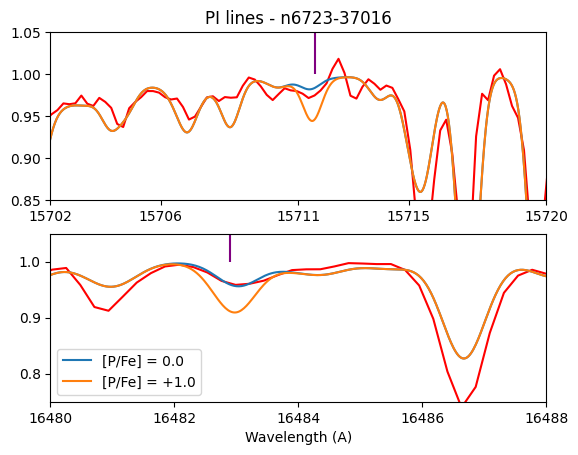

In [58]:
speclist = ["n6723-37016xa.dat", "n6723-37016xap1.dat"]
starname = 'n6723-37016'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6723-37016.dat", label, starname, 
      xoffset1 = 0.4, yoffset1 = -0.0, ncorr1 = 1.03, 
      xoffset2 = 0.4, yoffset2 = -0.02, ncorr2 = 1.0,
      ylim1 = (0.85, 1.05), ylim2 = (0.75, 1.05))

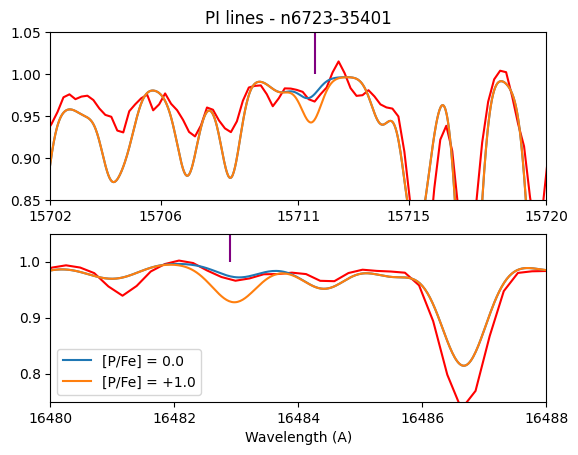

In [8]:
speclist = ["n6723-35401xa.dat", "n6723-35401xap1.dat"]
starname = 'n6723-35401'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "n6723-35401.dat", label, starname, 
      xoffset1 = 0.5, yoffset1 = -0.01, ncorr1 = 1.03, 
      xoffset2 = 0.5, yoffset2 = -0.02, ncorr2 = 1.0,
      ylim1 = (0.85, 1.05), ylim2 = (0.75, 1.05))

# SMC

## e223

### Finding CNO

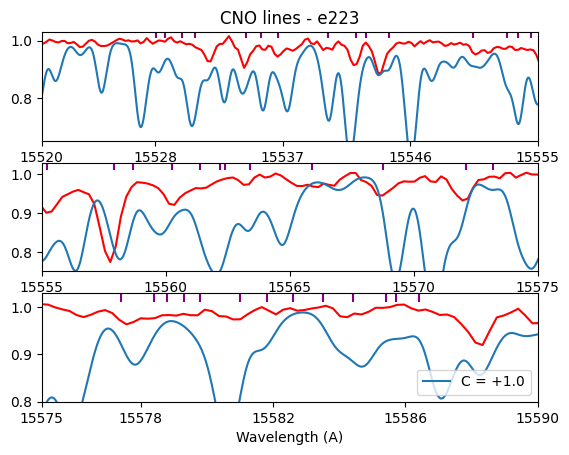

In [48]:
speclist = ["e223c.dat"]
starname = 'e223'
label = ["C = +1.0"]
plotC(speclist, "e223.dat", label, starname,
      xoffset1 = -6.15, yoffset1 = 0.080, ncorr1 = 1.1,
      xoffset2 = -6.3, yoffset2 = 0.060, ncorr2 = 1.1,
      xoffset3 = -6.3, yoffset3 = 0.080, ncorr3 = 1.1,
      ylim1 = (0.65, 1.03), ylim2 = (0.75, 1.03), ylim3 = (0.8, 1.03))

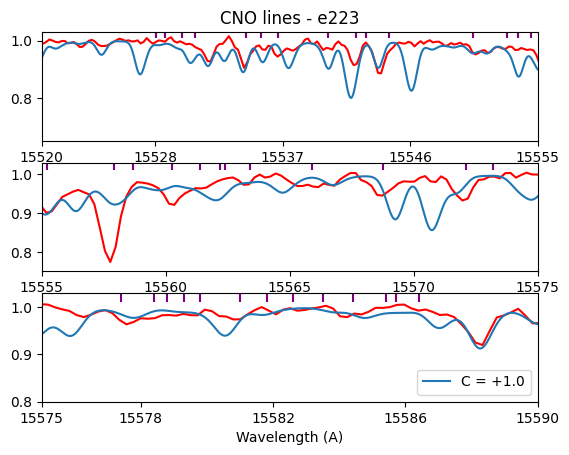

In [46]:
speclist = ["e223c.dat"]
starname = 'e223'
label = ["C = +1.0"]
plotC(speclist, "e223.dat", label, starname,
      xoffset1 = -6.15, yoffset1 = 0.080, ncorr1 = 1.1,
      xoffset2 = -6.3, yoffset2 = 0.060, ncorr2 = 1.1,
      xoffset3 = -6.3, yoffset3 = 0.080, ncorr3 = 1.1,
      ylim1 = (0.65, 1.03), ylim2 = (0.75, 1.03), ylim3 = (0.8, 1.03))

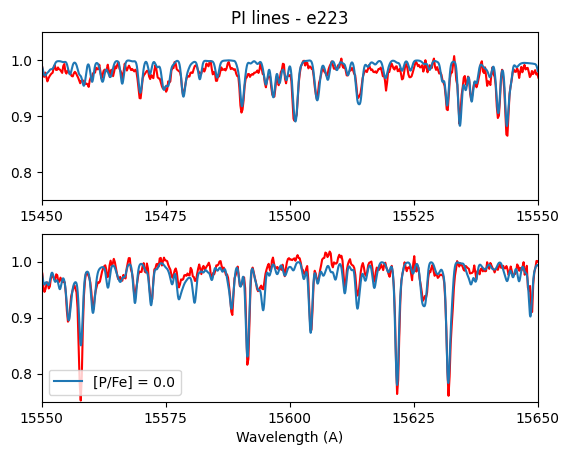

In [22]:
speclist = ["e223xb.dat"]
starname = 'e223'
label = ['[P/Fe] = 0.0']
plotP(speclist, "e223.dat", label, starname, 
      xoffset1 = -6.2, yoffset1 = -0.015, ncorr1 = 1.025, 
      xoffset2 = -6.2, yoffset2 = -0.04, ncorr2 = 1.025,
      xlim1 = (15450, 15550), xlim2 = (15550, 15650),
      ylim1 = (0.75, 1.05), ylim2 = (0.75, 1.05))

### PSK

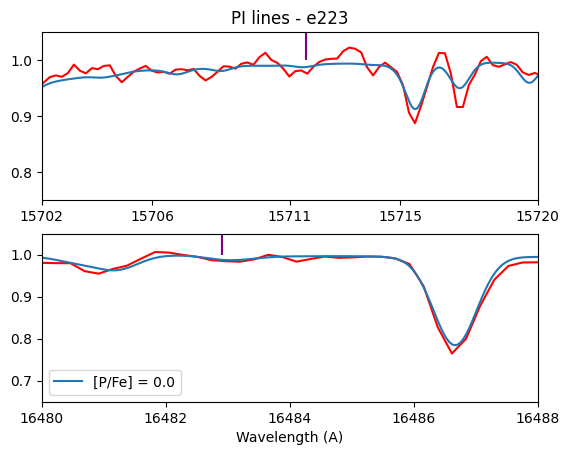

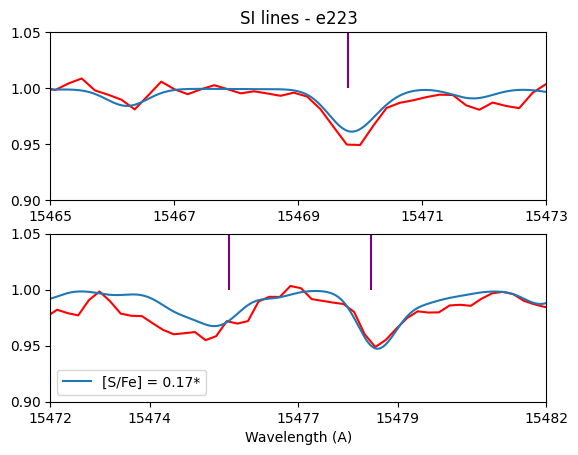

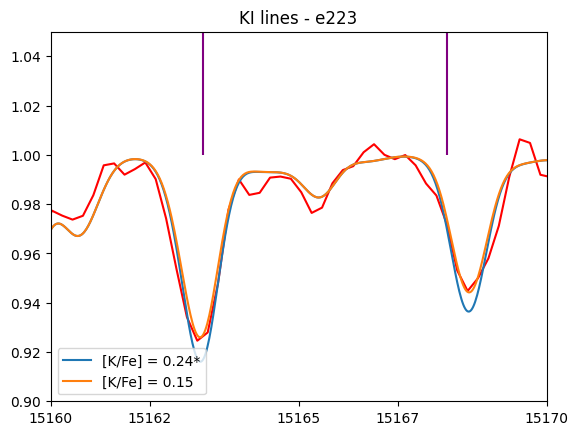

In [54]:
speclist = ["e223xa.dat"]
starname = 'e223'
label = ['[P/Fe] = 0.0']
plotP(speclist, "e223.dat", label, starname, 
      xoffset1 = -6.3, yoffset1 = 0.07, ncorr1 = 1.1, 
      xoffset2 = -6.7, yoffset2 = -0.015, ncorr2 = 1.0,
      ylim1 = (0.75, 1.05), ylim2 = (0.65, 1.05))

speclist = ["e223xb.dat"]
label = ['[S/Fe] = 0.17*']
plotS(speclist, "e223.dat", label, starname, 
      xoffset1 = -6.15, yoffset1 = 0.085, ncorr1 = 1.1, 
      xoffset2 = -6.15, yoffset2 = 0.080, ncorr2 = 1.1,
      ylim1 = (0.90, 1.05), ylim2 = (0.90, 1.05))

speclist = ["e223xb.dat", "e223xbkm015.dat"]
label = ['[K/Fe] = 0.24*','[K/Fe] = 0.15']
plotK(speclist, "e223.dat", label, starname, 
      xoffset1 = -6.0, yoffset1 = 0.08, ncorr1 = 1.1,
      ylim1 = (0.90, 1.05))

## e224

In [ ]:
speclist = ["e223xa.dat"]
starname = 'e223'
label = ['[P/Fe] = 0.0']
plotP(speclist, "e223.dat", label, starname, 
      xoffset1 = -6.3, yoffset1 = 0.07, ncorr1 = 1.1, 
      xoffset2 = -6.7, yoffset2 = -0.015, ncorr2 = 1.0,
      ylim1 = (0.75, 1.05), ylim2 = (0.65, 1.05))

speclist = ["e223xb.dat"]
label = ['[S/Fe] = 0.17*']
plotS(speclist, "e223.dat", label, starname, 
      xoffset1 = -6.15, yoffset1 = 0.085, ncorr1 = 1.1, 
      xoffset2 = -6.15, yoffset2 = 0.080, ncorr2 = 1.1,
      ylim1 = (0.90, 1.05), ylim2 = (0.90, 1.05))

speclist = ["e223xb.dat", "e223xbkm015.dat"]
label = ['[K/Fe] = 0.24*','[K/Fe] = 0.15']
plotK(speclist, "e223.dat", label, starname, 
      xoffset1 = -6.0, yoffset1 = 0.08, ncorr1 = 1.1,
      ylim1 = (0.90, 1.05))